In [2]:
import numpy as np
import ase
import glob
from matplotlib import pyplot as plt

import pandas as pd
import sys
sys.path.insert(0, '/home/misa/git_repositories/APDFT/prototyping/atomic_energies/')
import utils_qm as uqm
from parse_density_files import CUBE
import alchemy_tools2 as at
from ase.units import Bohr
from pyscf import gto, scf, mp, cc, dft


### Angles - methane HCH

In [59]:
paths_glob = glob.glob('/home/misa/projects/atomic-energies/data/ueg_reference/amons/geometry/angles/methane_HCH/ang*/results2.dict')
angle = []
for p in paths_glob:
    angle.append(float(p.split('/')[-2].split('_')[-1]))
paths = []
for p,a in zip(paths_glob,angle):
    paths.append((a,p))
paths.sort()
angle.sort()
data = []
for p in paths:
    data.append(uqm.load_obj(p[1]))

e_npbc = []
for d in data:
    e_npbc.append(d['e_nbpc'])
    
e_scaled = []
for d in data:
    e_scaled.append(d['e_scaled'])
e_scaled = np.array(e_scaled)

In [66]:
for d in data:
    Z = d['nuclei'][:,0]
    pos = d['nuclei'][:,1:]
    molecule = ase.Atoms(Z, pos)
    #print(molecule.get_angle(1,4,0))
    print(molecule.get_angle(1,4,2))
    #print(molecule.get_angle(1,4,3))

111.43453127963967
110.4638870425152
109.47346672236779
108.46450173698067
107.43828147217903


In [61]:
 np.linspace(-2,2,5)

array([-2., -1.,  0.,  1.,  2.])

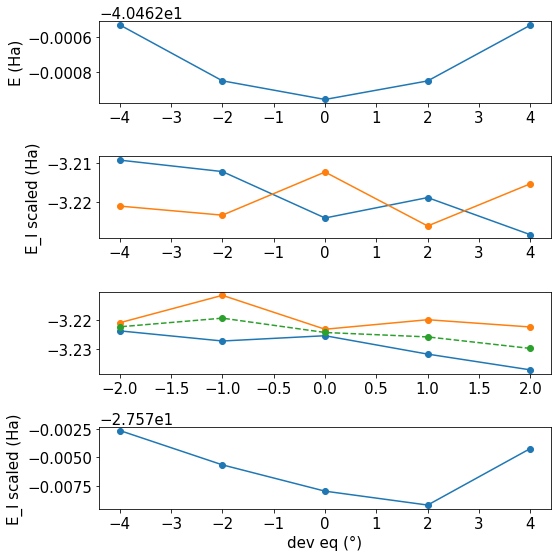

In [67]:
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(4)
ax[0].plot(angle,e_npbc, '-o', label='npbc')
ax[0].set_ylabel('E (Ha)')

ax[1].plot(angle, e_scaled[:,0], '-o')
ax[1].plot(angle, e_scaled[:,1], '-o')
#ax[1].plot(angle, (e_scaled[:,0]+e_scaled[:,1])/2, '--o')

#ax[1].plot(angle, e_scaled[:,2], '-o')
#ax[1].plot(angle, e_scaled[:,3], '-o')
ax[1].set_ylabel('E_I scaled (Ha)')
angle2 = np.linspace(2,-2,5)
ax[2].plot(angle2, e_scaled[:,2], '-o')
ax[2].plot(angle2, e_scaled[:,3], '-o')
ax[2].plot(angle2, (e_scaled[:,2]+e_scaled[:,3])/2, '--o')

ax[3].plot(angle, e_scaled[:,4], '-o')
ax[3].set_ylabel('E_I scaled (Ha)')
ax[3].set_xlabel('dev eq (°)')


fig.tight_layout()

### Angles - ethene HCH

In [69]:
paths_glob = glob.glob('/home/misa/projects/atomic-energies/data/ueg_reference/amons/geometry/angles/ethene_HCH/ang*/results2.dict')
angle = []
for p in paths_glob:
    angle.append(float(p.split('/')[-2].split('_')[-1]))
paths = []
for p,a in zip(paths_glob,angle):
    paths.append((a,p))
paths.sort()
angle.sort()
data = []
for p in paths:
    data.append(uqm.load_obj(p[1]))

e_npbc = []
for d in data:
    e_npbc.append(d['e_nbpc'])
    
e_scaled = []
for d in data:
    e_scaled.append(d['e_scaled'])
e_scaled = np.array(e_scaled)

In [78]:
for d in data:
    Z = d['nuclei'][:,0]
    pos = d['nuclei'][:,1:]
    molecule = ase.Atoms(Z, pos)
    print(molecule.get_angle(3,0,5))
    #print(molecule.get_angle(1,4,2))
    #print(molecule.get_angle(1,4,3))

151.55693556929694
149.55693651807073
147.55692744585545
145.55694976634265
143.55694915339626


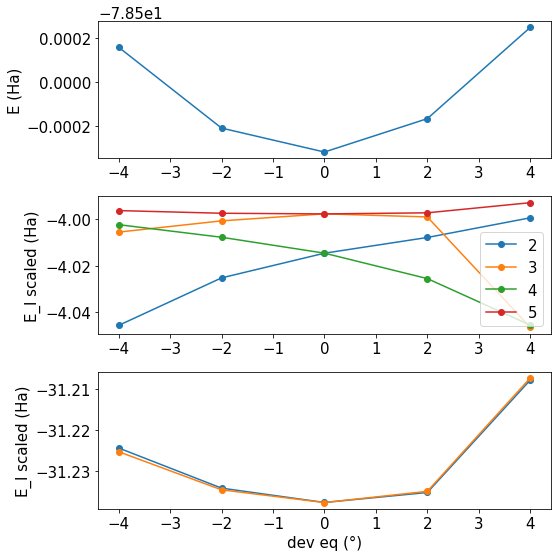

In [71]:
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(3)
ax[0].plot(angle,e_npbc, '-o', label='npbc')
ax[0].set_ylabel('E (Ha)')

ax[1].plot(angle, e_scaled[:,2], '-o', label='2')
ax[1].plot(angle, e_scaled[:,3], '-o', label='3')
ax[1].plot(angle, e_scaled[:,4], '-o', label='4')
ax[1].plot(angle, e_scaled[:,5], '-o', label='5')
ax[1].set_ylabel('E_I scaled (Ha)')
ax[1].legend()

ax[2].plot(angle, e_scaled[:,0], '-o')
ax[2].plot(angle, e_scaled[:,1], '-o')
ax[2].set_ylabel('E_I scaled (Ha)')
ax[2].set_xlabel('dev eq (°)')


fig.tight_layout()

### Angles - water

In [55]:
paths_glob = glob.glob('/home/misa/projects/atomic-energies/data/ueg_reference/amons/geometry/angles/water/ang*/results2.dict')
angle = []
for p in paths_glob:
    angle.append(float(p.split('/')[-2].split('_')[-1]))
paths = []
for p,a in zip(paths_glob,angle):
    paths.append((a,p))
paths.sort()
angle.sort()
data = []
for p in paths:
    data.append(uqm.load_obj(p[1]))

e_npbc = []
for d in data:
    e_npbc.append(d['e_nbpc'])
    
e_scaled = []
for d in data:
    e_scaled.append(d['e_scaled'])
e_scaled = np.array(e_scaled)

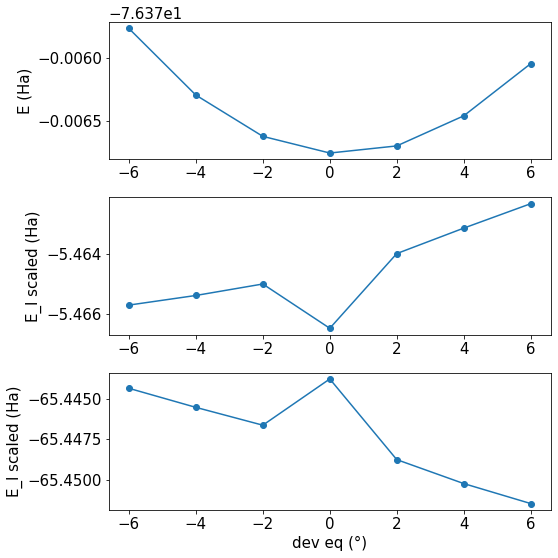

In [56]:
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(3)
ax[0].plot(angle, e_npbc, '-o')
ax[0].set_ylabel('E (Ha)')
#plt.plot(angle,e_npbc, '-o', label='npbc')
ax[1].plot(angle, (e_scaled[:,0]+e_scaled[:,1])/2, '-o')
ax[1].set_ylabel('E_I scaled (Ha)')
ax[2].plot(angle, e_scaled[:,2], '-o')
ax[2].set_ylabel('E_I scaled (Ha)')
ax[2].set_xlabel('dev eq (°)')
fig.tight_layout()

### Dihedrals - ethane

In [57]:
paths_glob = glob.glob('/home/misa/projects/atomic-energies/data/ueg_reference/amons/geometry/dihedrals/ethane/dihe*/results2.dict')
angle = []
for p in paths_glob:
    angle.append(float(p.split('/')[-2].split('_')[-1]))
paths = []
for p,a in zip(paths_glob,angle):
    paths.append((a,p))
paths.sort()
angle.sort()
data = []
for p in paths:
    data.append(uqm.load_obj(p[1]))

e_npbc = []
for d in data:
    e_npbc.append(d['e_nbpc'])
    
e_scaled = []
for d in data:
    e_scaled.append(d['e_scaled'])
e_scaled = np.array(e_scaled)

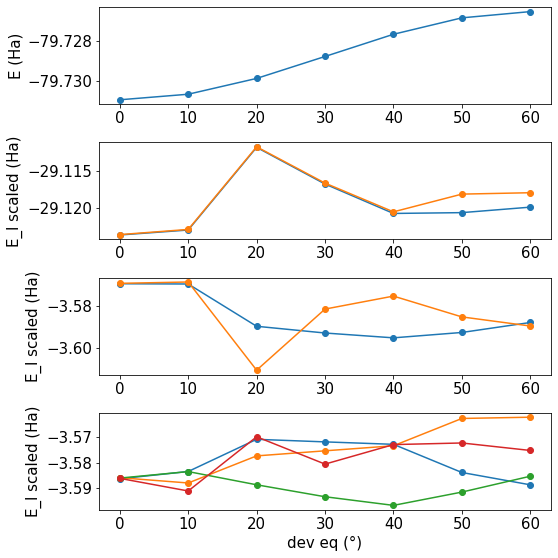

In [58]:
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(4)
ax[0].plot(angle, e_npbc, '-o')
ax[0].set_ylabel('E (Ha)')

#plt.plot(angle,e_npbc, '-o', label='npbc')
ax[1].plot(angle, e_scaled[:,0], '-o')
ax[1].plot(angle, e_scaled[:,1], '-o')

ax[1].set_ylabel('E_I scaled (Ha)')

ax[2].plot(angle, e_scaled[:,2], '-o')
ax[2].plot(angle, e_scaled[:,7], '-o')
ax[2].set_ylabel('E_I scaled (Ha)')

ax[3].plot(angle, e_scaled[:,3], '-o')
ax[3].plot(angle, e_scaled[:,4], '-o')
ax[3].plot(angle, e_scaled[:,5], '-o')
ax[3].plot(angle, e_scaled[:,6], '-o')
ax[3].set_ylabel('E_I scaled (Ha)')
ax[3].set_xlabel('dev eq (°)')

fig.tight_layout()